# Augmentation

In [2]:
import os
import cv2
import json
import shutil
import random
import numpy as np
import glob
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

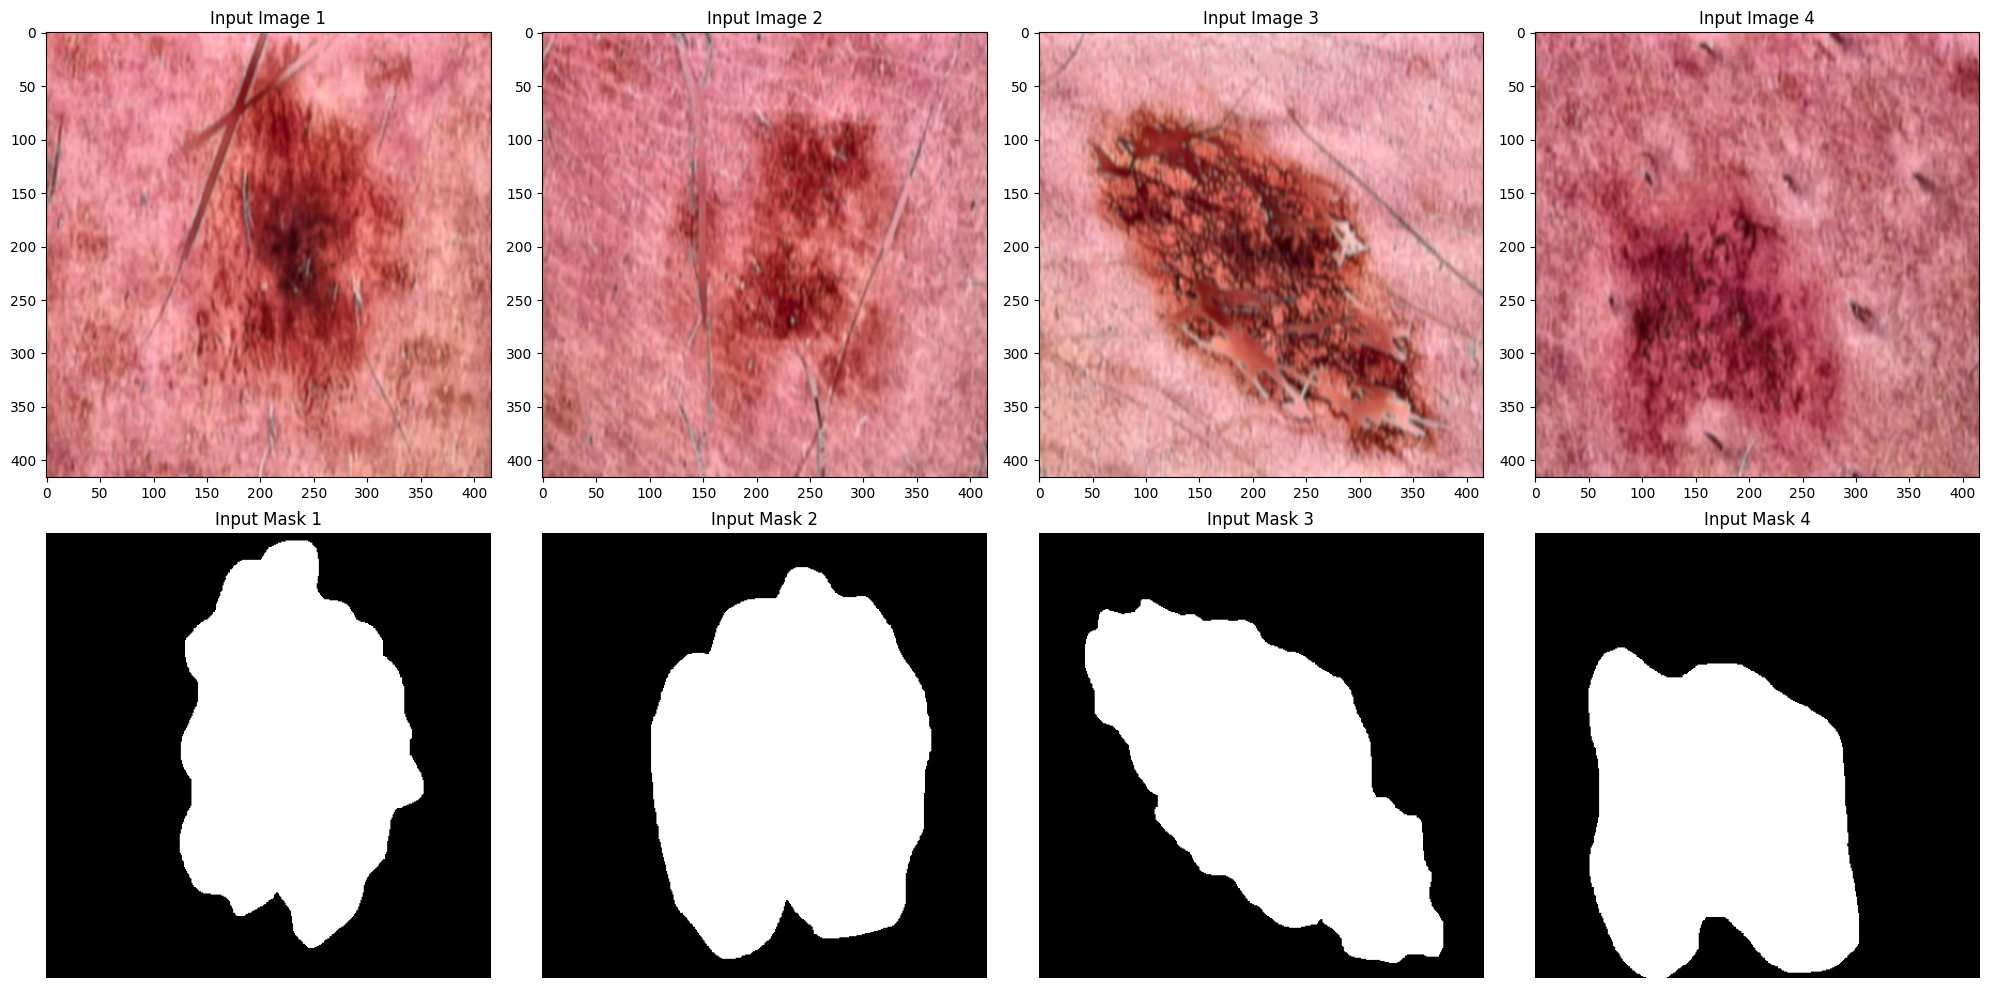

In [4]:

# Path to the dataset directory
dataset_dir = "Data/"

# Path to the input images and masks directories
input_images_dir = os.path.join(dataset_dir, "Image/train/")
input_masks_dir = os.path.join(dataset_dir, "Layers/train/")

# Get the list of files in the input images directory
input_image_files = os.listdir(input_images_dir)[:4]

# Get the corresponding mask file names
input_mask_files = [file.replace(".jpg", "_segmentation.png") for file in input_image_files]

# Display the images and masks
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (input_image_file, input_mask_file) in enumerate(zip(input_image_files, input_mask_files)):
    # Load and display the input image
    input_image_path = os.path.join(input_images_dir, input_image_file)
    input_image = plt.imread(input_image_path)
    axes[0, i].imshow(input_image)
    axes[0, i].axis('on')
    axes[0, i].set_title(f"Input Image {i+1}")

    # Load and display the input mask
    input_mask_path = os.path.join(input_masks_dir, input_mask_file)
    input_mask = plt.imread(input_mask_path)
    axes[1, i].imshow(input_mask, cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f"Input Mask {i+1}")

plt.tight_layout()
plt.show()


In [6]:
from pathlib import Path

data_dir = Path("Data")

test_images_dir = data_dir / "AugmentedData"
test_images_dir.mkdir(exist_ok=True)


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

def preprocess_image(img):
    normalized_img = img / 255.0  # Simple example: normalize pixel values to [0, 1]
    return normalized_img

# Path to the dataset folder
dataset_path = input_images_dir 

# Output folder for the augmented images
output_folder = 'Data/AugmentedData'

# Number of times to increase the dataset size
multiplier = 5

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    preprocessing_function=preprocess_image,
    vertical_flip=True,
    brightness_range=(0.5, 1.15),
    rotation_range=2,
    zoom_range=(0.7, 1),
    channel_shift_range=10
)

# Get the list of all image files in the dataset folder
image_files = [f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

# Augment images
for image_file in image_files:
    # Load the image
    img = Image.open(os.path.join(dataset_path, image_file))

    # Convert the image to a numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Reshape the image to (1, height, width, channels) for the datagen.flow() method
    img_array = img_array.reshape((1,) + img_array.shape)

    # Generate augmented images
    augmented_images = datagen.flow(img_array, batch_size=1)

    # Save the augmented images to the output folder
    for i in range(multiplier):
        augmented_image = next(augmented_images)[0]
        augmented_image = Image.fromarray((augmented_image * 255).astype('uint8'))
        augmented_image.save(os.path.join(output_folder, f'{image_file[:-4]}_augmented_{i}.png'))

# Print a message when the process is complete
print(f"Augmented images saved to {output_folder}")


Augmented images saved to Data/AugmentedData
